In [ ]:
"""\
# Copyright (C) 2024 Jesús Bautista Villar <jesbauti20@gmail.com>
- The code in this notebook reads a given .csv PaparazziUAV log file,
  extracts the desired data and plots it. The example data provided is 
  from an experiment where there is one rover patrols a desired shape
  while measuring the RSSI of the XBee radio located at the Ground Station -
"""

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np

# Graphic tools
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# --------------------------------------------------------------------------------------

DATA_PATH = os.path.join("..","data")

In [2]:
def load_data(filename, t0, tf):
    """
    Load Paparazzi .csv data files
    """
    data = pd.read_csv(os.path.join(DATA_PATH, filename), sep="\t")
    data = data.loc[(data["Time"] >= t0) & (data["Time"] <= tf)]
    return data

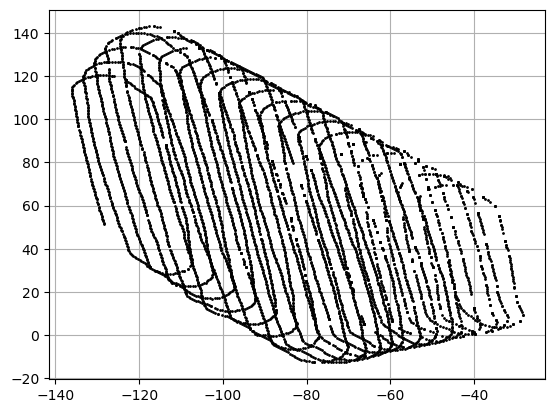

In [8]:
# Loading data
t0, tf = 1600, 3300
filename = "23_11_15__09_16_45_2.csv"

data = load_data(filename, t0, tf)
# print(data.shape)
# print(data.head())

# Procressing the data
data_time = np.array(data["Time"].to_list())
data_rssi =- np.array(data["RSSI:rssi"].to_list())
data_x = np.array(data["ROTORCRAFT_FP:east"].to_list())/100
data_y = np.array(data["ROTORCRAFT_FP:north"].to_list())/100

plt.plot(data_x, data_y, ".k", markersize=2)
plt.grid(True)

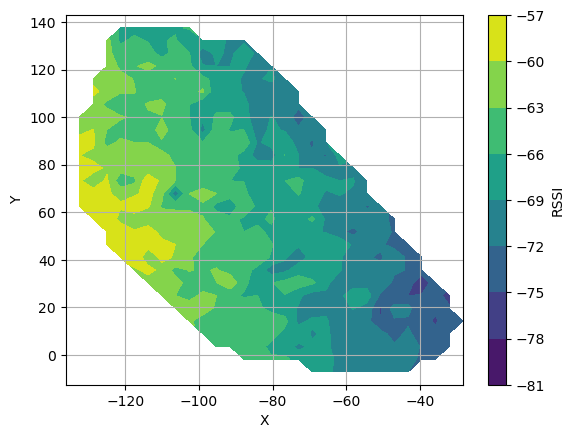

In [9]:
# Generate the heat map
ceils = 30
x = np.linspace(np.min(data_x), np.max(data_x), ceils)
y = np.linspace(np.min(data_y), np.max(data_y), ceils)
grid_x, grid_y = np.meshgrid(x,y)

points = np.array([data_x,data_y]).T
values = data_rssi

grid_z0 = griddata(points, values, (grid_x, grid_y), method='linear').T

# Plot it
plt.contourf(x, y, grid_z0)

plt.ylabel("Y")
plt.xlabel("X")
plt.grid(True)
plt.colorbar(label='RSSI')

plt.show()